In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib
######################################################
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt

font = {'weight' : 'regular',
        'size'   : 22}

plt.rc('font', **font)

import matplotlib.font_manager as font_manager

plt.rcParams['lines.linewidth'] = 2 ;
plt.rc('axes', linewidth=1.80) ;
plt.rcParams["savefig.dpi"] = 340 ;
plt.rcParams.update({'font.size': 19}) ;
plt.rcParams["font.family"] = "Arial" 
plt.rcParams["figure.figsize"] = (8,7)
######################################################
from src import core
from src import lra

In [7]:
data = core.generate_2D_sample(300, 10, 200, 800)
print(data[0].shape)
print(data[1].shape)


xaxis = data[0]
dataset = data[1]
stats_res =   lra.evaluate_stats ( xaxis, dataset )

(300,)
(300, 800)

	 Total tests :  18


In [8]:
print(stats_res)

[[ 2.00000000e+00  5.07177610e-05  1.74223973e+01  1.16147378e-01
   4.93109093e-01  9.93445282e-01 -2.15118362e-07 -3.67501081e-02
  -6.31024328e-03  1.12353437e-04]
 [ 3.00000000e+00  5.05026427e-05  1.73856472e+01  1.09837135e-01
   4.93221446e-01  9.93500768e-01 -2.14069511e-07 -8.78334194e-02
   1.69740658e-03  9.05661560e-03]
 [ 4.00000000e+00  5.02885731e-05  1.72978137e+01  1.11534541e-01
   5.02278062e-01  9.93555749e-01 -2.12646488e-07 -9.47607068e-03
  -1.53706634e-04 -6.94128843e-03]
 [ 5.00000000e+00  5.00759267e-05  1.72883377e+01  1.11380835e-01
   4.95336774e-01  9.93610133e-01 -2.08696744e-07 -3.56070857e-01
  -1.66009487e-04 -8.24449617e-03]
 [ 6.00000000e+00  4.98672299e-05  1.69322668e+01  1.11214825e-01
   4.87092277e-01  9.93663283e-01 -2.08432802e-07 -1.16692973e-01
  -9.24406022e-04  1.01852763e-03]
 [ 7.00000000e+00  4.96587971e-05  1.68155738e+01  1.10290419e-01
   4.88110805e-01  9.93716144e-01 -2.06175309e-07 -8.35582701e-02
  -4.60203357e-04 -5.46426232e-03

(300, 800)


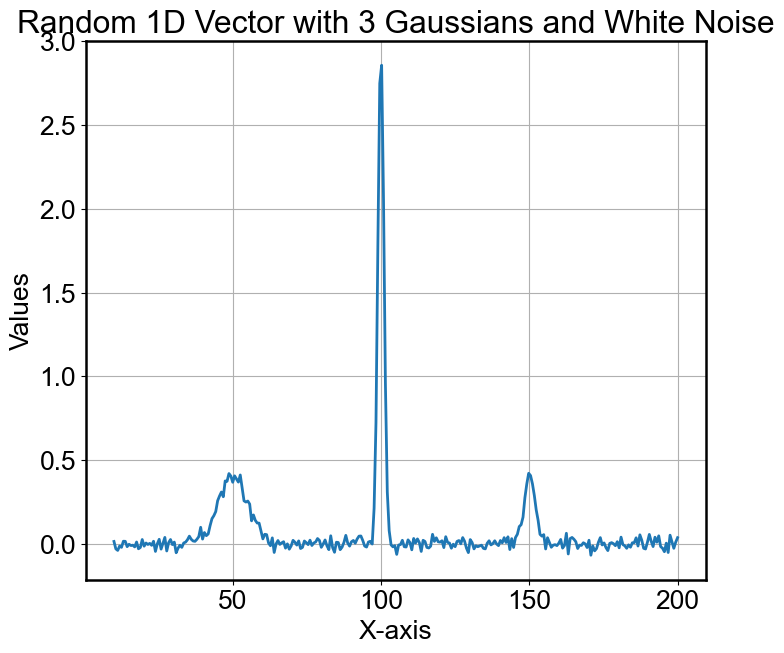

In [5]:
x = data[0]
y = data[1]

print(y.shape)

# plotting a single vector
d0 = y[:,0]

# Plot the generated 1D vector
plt.plot(x, d0)
plt.title('Random 1D Vector with 3 Gaussians and White Noise')
plt.xlabel('X-axis')
plt.ylabel('Values')
plt.grid()
plt.show()

In [12]:
################################################################

def plot_stats(  result , file_name_with_ext, desc):
    # Assuming x, fnorm, ifnorm, absDiff, stdev, retention are already defined
    # If not, you can define them using your data

    # Example data (replace with your actual data)
    x = result[:, 0]
    fnorm = result[:, 1]
    ifnorm = result[:, 2]
    absDiff = result[:, 3]
    stdev = result[:, 4]
    retention = result[:, 5]    
 
    # Convert x values to integers
    x_int = result[:, 0].astype(int)

    # Create subplots with a shared x-axis
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9, 12), sharex=True)
    
    #config
    marker_size = 8
    legend_x_position = 0.4

    # Plot 1: x vs absDiff and x vs stdev
    color1 = 'tab:blue'
    ax1.set_ylabel('Max absolute difference', color=color1)
    ax1.plot(x_int, absDiff, marker='<', linestyle='-', color=color1, label='Absolute Difference',
              markersize= marker_size ,  markeredgecolor='black')
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.legend( loc=( legend_x_position, 0.75) )
    ax1.grid(True)
    ax1.set_xticks(x_int)
    ax1.set_xticklabels(x_int )  # Adjust rotation as needed
    ax1.xaxis.set_tick_params(labelbottom=True)


    # Create a second y-axis on the right side for the first plot
    ax1_right = ax1.twinx()
    color2 = 'tab:red'
    ax1_right.set_ylabel('Standard deviation', color=color2)
    ax1_right.plot(x_int, stdev, marker='X', linestyle='--', color=color2, label='Standard Deviation',
                  markersize= marker_size ,  markeredgecolor='black')
    ax1_right.tick_params(axis='y', labelcolor=color2)
    ax1_right.legend( loc=( legend_x_position, 0.55) )

    # Plot 2: x vs fnorm and x vs ifnorm (with ifnorm on the right y-axis)
    color3 = 'tab:blue'
    ax2.set_ylabel('Frobenius norm', color=color3)
    ax2.plot(x_int, fnorm, marker='o', linestyle='-', color=color3, label='Frobenius Norm',
            markersize= marker_size ,  markeredgecolor='black')
    ax2.tick_params(axis='y', labelcolor=color3)
    ax2.legend(loc=( legend_x_position, 0.75) )
    ax2.grid(True)
    ax2.set_xticks(x_int)
    ax2.set_xticklabels(x_int )  # Adjust rotation as needed
    ax2.xaxis.set_tick_params(labelbottom=True)

    # Create a second y-axis on the right side for the second plot
    ax2_right = ax2.twinx()
    color4 = 'tab:red'
    ax2_right.set_ylabel('Infinity norm', color=color4)
    ax2_right.plot(x_int, ifnorm, marker='s', linestyle='--', color=color4, label='Infinity Norm',
                  markersize= marker_size ,  markeredgecolor='black')
    ax2_right.tick_params(axis='y', labelcolor=color4)
    ax2_right.legend( loc=( legend_x_position, 0.55) )

    # Plot 3: x vs retention
    color5 = 'tab:green'
    ax3.set_ylabel('Retention', color=color5)
    ax3.plot(x_int, retention, marker='D', linestyle='-', color=color5, label='Retention',
            markersize= marker_size ,  markeredgecolor='black')
    ax3.tick_params(axis='y', labelcolor=color5)
    ax3.legend( loc='best' )
    ax3.grid(True)
    ax3.set_ylim(top=1.0002)

    # Add common x-label
    fig.text(0.5, 0.04, '(p-th) low-rank approximation', ha='center', va='center', fontsize=19)

    #plt.suptitle('Comparison of Absolute Difference, Standard Deviation, Frobenius Norm, Infinity Norm, and Retention')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    #plt.xticks(np.arange(min(x), max(x)+1, 1))  # Set ticks at integer positions
    plt.xlim([1.875,15.13])
    
    # add description
    plt.gcf().text(0.03, 0.03, desc, fontsize=14)
    
    #folder="./plots/"
    #output = folder + file_name_with_ext
    #plt.savefig( output , dpi=350, bbox_inches = "tight")
    plt.show()

    
################################################################

Text(0.5, 0, 'X-axis')

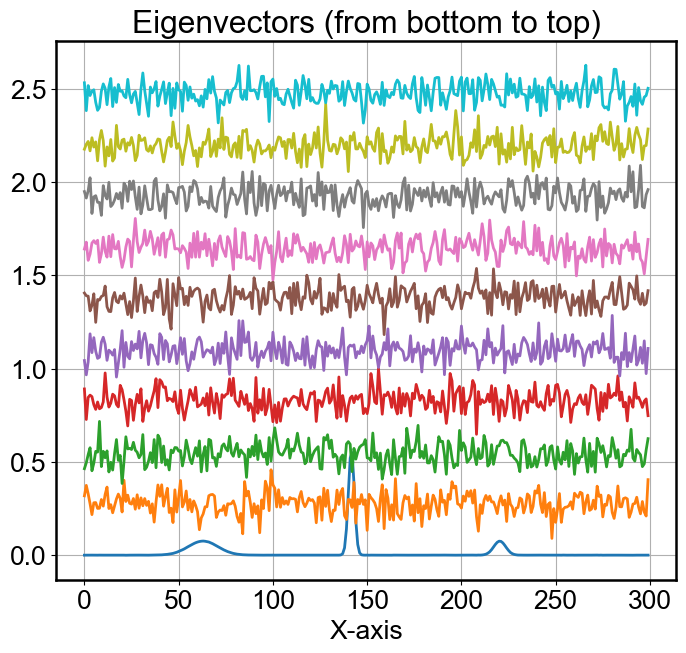

In [13]:
U, S, Vh = np.linalg.svd(y, full_matrices=True)

n=10
offset = 0.275
for i in range(n):
    plt.plot(U[:,i]+offset*i)

plt.grid()
plt.title('Eigenvectors (from bottom to top)')
plt.xlabel('X-axis')

## Statistical results are plotted here

X-axis represents n-th order low-rank approximation

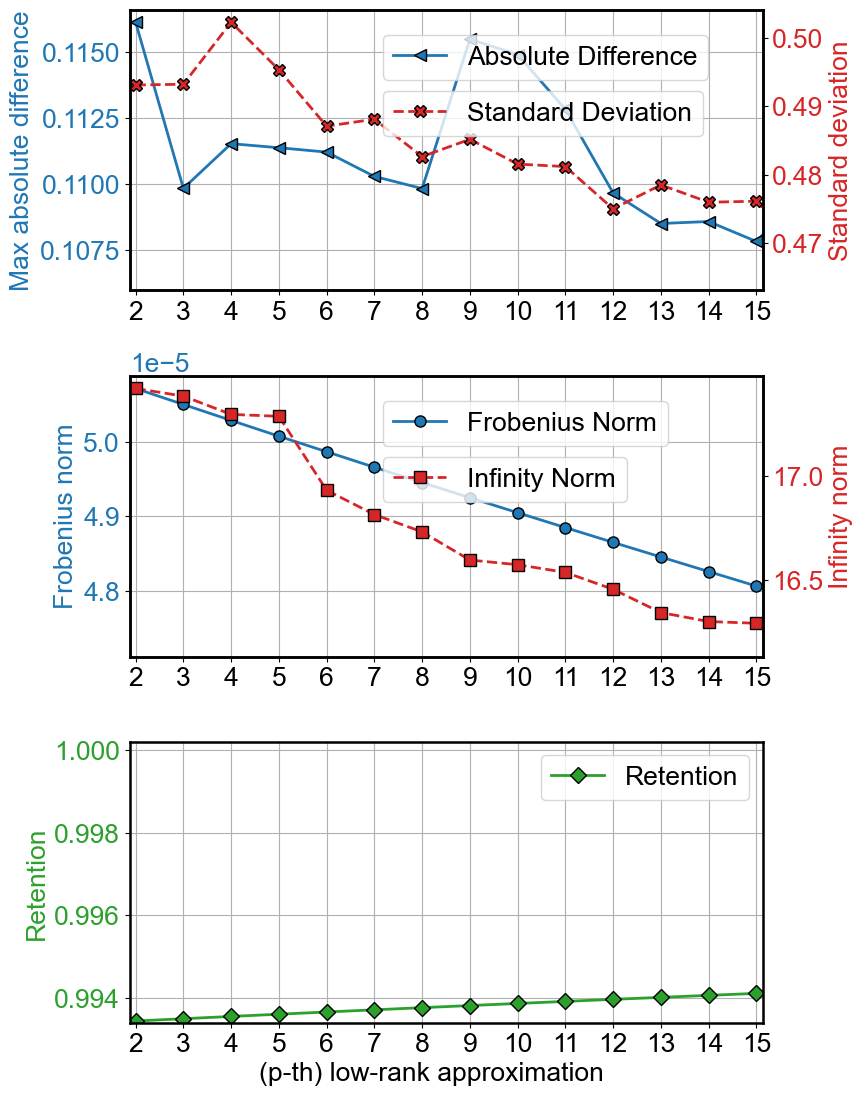

In [24]:
plot_stats( stats_res , 'desc.png', '')
 

Text(0.5, 0, 'index')

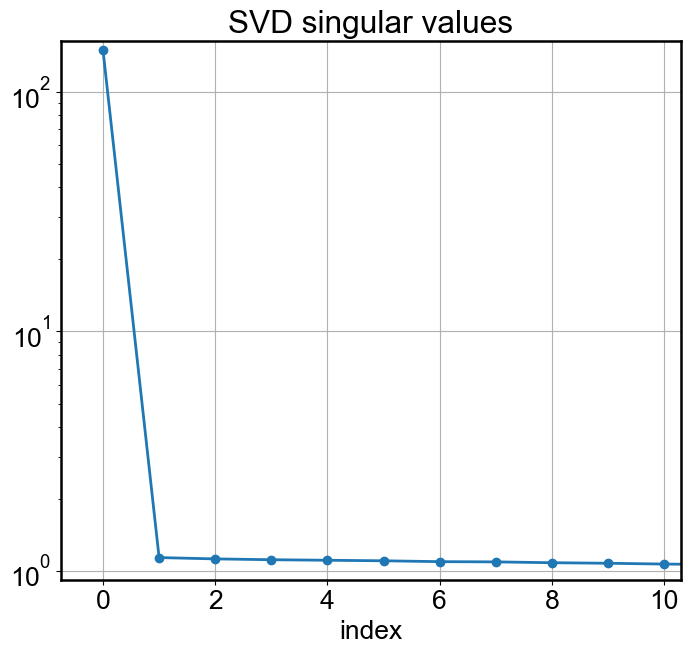

In [25]:
# see eigenvalues

n = 23
view = 10
subset =  S[:n]
minY  = np.min(subset)
maxY = np.max(subset)

plt.plot(S, 'o-')
plt.yscale('log')
plt.ylim([minY-(0.095*minY), maxY+(0.095*maxY)])
plt.xlim([-0.75, view+0.3])
plt.grid()

 
plt.title('SVD singular values')
plt.xlabel('index')